In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data Analysis and Data Preprocessing

In [ ]:
psu_data = pd.read_csv('/content/parkinsons_updrs.csv')

In [ ]:
psu_data

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [ ]:
psu_data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


There is a status column which has two entries:
1: Parkinson's patient
0: Healthy patient

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.


In [ ]:
ps_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
q = ps_data.shape
print(q)
print("Checking for null values")
ps_data.isnull().sum()

(195, 24)
Checking for null values


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
ps_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Count: number of values in each column

Mean: mean value of all the values of that column

std: standard Deviation

25% : 25% values less than the value mentioned for the column

50% : 50% values less than the value mentioned for the column

75% : 75% values less than the value mentioned for the column

In [ ]:
ps_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


AxesSubplot(0.125,0.125;0.62x0.755)


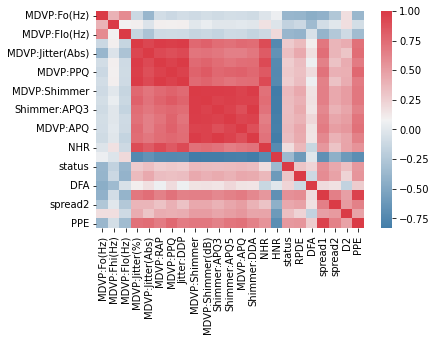

In [ ]:
corr = ps_data.corr()
cmap = sns.diverging_palette(240,10, as_cmap=True)
print (sns.heatmap(corr, cmap=cmap))

In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
fig = px.scatter_matrix(ps_data, dimensions=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'status'], color="status")
fig.show()

In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
fig = px.scatter_matrix(ps_data, dimensions=['Jitter:DDP', 'MDVP:Shimmer', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'status'], color="status")
fig.show()

In [ ]:

import plotly
import plotly.graph_objs as go
import plotly.express as px
fig = px.scatter_matrix(ps_data, dimensions=[ 'NHR', 'HNR', 'RPDE', 'DFA', 'status'], color="status")
fig.show()

In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
fig = px.scatter_matrix(ps_data, dimensions=['spread2', 'D2', 'PPE','status'], color="status")
fig.show()

In [ ]:
X = ps_data.drop(columns=['name','status'],axis=1)
Y = ps_data['status']

In [ ]:
print(X)
print(Y)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  ...   spread2        D2       PPE
0        119.992       157.302        74.997  ...  0.266482  2.301442  0.284654
1        122.400       148.650       113.819  ...  0.335590  2.486855  0.368674
2        116.682       131.111       111.555  ...  0.311173  2.342259  0.332634
3        116.676       137.871       111.366  ...  0.334147  2.405554  0.368975
4        116.014       141.781       110.655  ...  0.234513  2.332180  0.410335
..           ...           ...           ...  ...       ...       ...       ...
190      174.188       230.978        94.261  ...  0.121952  2.657476  0.133050
191      209.516       253.017        89.488  ...  0.129303  2.784312  0.168895
192      174.688       240.005        74.287  ...  0.158453  2.679772  0.131728
193      198.764       396.961        74.904  ...  0.207454  2.138608  0.123306
194      214.289       260.277        77.973  ...  0.190667  2.555477  0.148569

[195 rows x 22 columns]
0      1
1     

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(195, 22) (165, 22) (30, 22)


####Standardizing the data

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[-1.17019022 -0.7196696  -0.33023438 ... -0.22568351 -1.0456428
   1.17870509]
 [-0.42865712 -0.21909191 -0.91902999 ...  0.36354622  0.31121179
  -0.08860216]
 [ 0.88652261  0.11581564 -0.83533502 ...  0.64593687  0.53881464
  -0.24288879]
 ...
 [-0.89490527 -0.66279574 -0.14378319 ...  1.24656234 -0.48986604
  -0.21563557]
 [-0.3555441   0.21208708 -0.77130534 ... -0.17052852 -0.488536
   0.28786548]
 [ 0.99736429  0.21402263 -0.60049242 ... -0.71475931  1.23619759
  -0.05616301]]


#MODEL : SVM

In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(Y_train,X_train_pred)

In [ ]:
print("SVM training accuracy :-")
print(training_accuracy)

SVM training accuracy :-
0.896969696969697


In [ ]:
X_test_pred = model.predict(X_test)
testing_accuracy = accuracy_score(Y_test,X_test_pred)
print("SVM testing accuracy :-")
print(testing_accuracy)

SVM tresting accuracy :-
0.8666666666666667


PREDICTION

In [ ]:
r_data = ()
r_data_np = np.asarray(r_data)
r_data_shape = r_data_np.reshape(1,-1)
real_world_data = scaler.transfor(r_data_shape)
prediction = model.predict(real_world_data)
print(Prediction)

#MODEL : RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
model_r = RandomForestClassifier(n_estimators=100)

model_r.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
X_train_pred_r = model_r.predict(X_train)
training_accuracy = accuracy_score(Y_train,X_train_pred_r)
print("Randomforest training accuracy :-")
print(training_accuracy)

Randomforest training accuracy :-
1.0


In [ ]:
X_test_pred_r = model_r.predict(X_test)
testing_accuracy = accuracy_score(Y_test,X_test_pred_r)
print("Randomforest testing accuracy :-")
print(testing_accuracy)

Randomforest testing accuracy :-
0.8333333333333334


#MODEL : Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_n = GaussianNB()
model_n.fit(X_train,Y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
X_train_pred_n = model_n.predict(X_train)
training_accuracy = accuracy_score(Y_train,X_train_pred_n)
print("Naive Bayes training accuracy :-")
print(training_accuracy)

Naive Bayes training accuracy :-
0.7272727272727273


In [ ]:
X_test_pred_n = model_n.predict(X_test)
testing_accuracy = accuracy_score(Y_test,X_test_pred_n)
print("Naive Bayes testing accuracy :-")
print(testing_accuracy)

Naive Bayes testing accuracy :-
0.5666666666666667


#Model : KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_k = KNeighborsClassifier(n_neighbors=13)
model_k.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
X_train_pred_k = model_k.predict(X_train)
training_accuracy = accuracy_score(Y_train,X_train_pred_k)
print("KNN training accuracy :-")
print(training_accuracy)

KNN training accuracy :-
0.9212121212121213


In [ ]:
X_test_pred_k = model_k.predict(X_test)
testing_accuracy = accuracy_score(Y_test,X_test_pred_k)
print("KNN testing accuracy :-")
print(testing_accuracy)

KNN testing accuracy :-
0.9


#MODEL : LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
model_l = LogisticRegression()
model_l.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_train_pred_l = model_l.predict(X_train)
training_accuracy = accuracy_score(Y_train,X_train_pred_l)
print("Logistic Regression training accuracy :-")
print(training_accuracy)

Logistic Regression training accuracy :-
0.8727272727272727


In [ ]:
X_test_pred_l = model_l.predict(X_test)
testing_accuracy = accuracy_score(Y_test,X_test_pred_l)
print("Logistic Regression testing accuracy :-")
print(testing_accuracy)

Logistic Regression testing accuracy :-
0.7666666666666667


#MODEL : DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_d = DecisionTreeClassifier()
model_d.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
X_train_pred_d = model_d.predict(X_train)
training_accuracy = accuracy_score(Y_train,X_train_pred_d)
print("Decision Tree training accuracy :-")
print(training_accuracy)

Decision Tree training accuracy :-
1.0


In [ ]:
X_test_pred_d = model_d.predict(X_test)
testing_accuracy = accuracy_score(Y_test,X_test_pred_d)
print("Decision Tree testing accuracy :-")
print(testing_accuracy)

Decision Tree testing accuracy :-
0.7333333333333333


#Training and Testing Accuracy Comparisions of various models

Model Name            | Training Accuracy  | Testing Accuracy   |
----------------------|--------------------|--------------------|
SVM                   | 0.896969696969697  | 0.8666666666666667 |
RandomForestClassifier| 1.0                | 0.8333333333333334 |
Naive Bayes           | 0.7272727272727273 | 0.5666666666666667 |
KNN                   | 0.9212121212121213 | 0.9                |
Logistic Regression   | 0.8727272727272727 | 0.7666666666666667 |
Decision Tree         | 1.0                | 0.7333333333333333 |


